# Experiment 2

### Problem Statement
Compute Karl Pearson’s and Spearman’s Rank Correlation.

### Dataset Link

https://www.kaggle.com/datasets/brendan45774/test-file

### Code

In [157]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Perfroming on Random Generated Data

In [158]:
# setting the seed
np.random.seed(42)

In [159]:
# generating a list x with 100 random numbers
x = np.random.rand(100)
print("x: ", x)

x:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
 0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691
 0.03438852 0.9093204  0.25877998 0.66252228 0.31171108 0.52006802
 0.54671028 0.18485446 0.96958463 0.77513282 0.93949894 0.89482735
 0.59789998 0.92187424 0.0884925  0.19598286 0.04522729 0.32533033
 0.38867729 0.27134903 0.82873751 0.35675333 0.28093451 0.54269608
 0.14092422 0.80219698 0.07455064 0.98688694 0.77224477 0.19871568
 0.00552212 0.81546143 0.70685734 0.72900717 0.77127035 0.07404465
 0.35846573 0.11586906 0.86310343 0.62329813 0.33089802 0.06355835
 0.31098232 0.32518332 0.72960618 0.63755747 0.88721274 0.

In [160]:
# generate a list y_positive with postive corelation with x
y_positive = x + np.random.rand(100)
print("y_positive: ", y_positive)
print("\n")

# generate a list y_negative with negative corelation with x
y_negative = 1 - x + np.random.rand(100)
print("y_negative: ", y_negative)
print("\n")

# generate a list y_no_corelation with no corelation with x
y_no_corelation = np.random.rand(100)
print("y_no_corelation: ", y_no_corelation)
print("\n")

y_positive:  [0.4059693  1.58712472 1.04634992 1.10722918 1.06358511 0.40528675
 0.46846654 1.62172728 0.82991318 0.78505249 0.31033595 1.13113114
 1.76214029 1.02045949 0.81522872 1.0548651  1.10791432 0.71132649
 1.32450402 0.83057138 1.41929305 1.03558516 0.61014812 0.47641377
 0.68400515 1.21228375 1.01768855 1.37496502 0.5993667  0.55719772
 1.02495586 0.39263193 0.18491696 1.28650071 1.90854174 1.13160028
 0.82340439 0.80069107 1.04786263 1.41193458 1.08448553 0.74695921
 0.53163703 1.21019871 0.54362048 0.69940923 0.92127541 1.02274704
 0.59818903 0.46350092 1.87785051 1.01469471 1.08439381 1.38428011
 1.58355043 1.16392951 0.76062805 0.95760248 0.28286483 1.05354668
 0.75646042 0.90365486 1.46226722 0.89252801 0.37122428 1.37799858
 0.46170429 0.98871549 0.11532579 1.57777988 1.44980913 0.21530351
 0.51761518 1.0419572  1.35203013 0.9033736  1.46220808 0.46078
 1.29519572 0.25339    1.20416978 0.73677165 1.25559164 0.9408977
 0.56892395 0.98516737 1.54682838 1.19275828 1.416863

In [161]:
# making a dataframe with x, y_positive, y_negative, y_no_corelation as columns
df = pd.DataFrame({"x": x, "y_positive": y_positive, "y_negative": y_negative, "y_no_corelation": y_no_corelation})
print("df:\n\n", df.to_markdown())

df:

 |    |          x |   y_positive |   y_negative |   y_no_corelation |
|---:|-----------:|-------------:|-------------:|------------------:|
|  0 | 0.37454    |     0.405969 |     1.26749  |         0.0516817 |
|  1 | 0.950714   |     1.58712  |     0.133426 |         0.531355  |
|  2 | 0.731994   |     1.04635  |     0.429635 |         0.540635  |
|  3 | 0.598658   |     1.10723  |     1.2999   |         0.63743   |
|  4 | 0.156019   |     1.06359  |     1.45041  |         0.726091  |
|  5 | 0.155995   |     0.405287 |     0.853203 |         0.975852  |
|  6 | 0.0580836  |     0.468467 |     1.04339  |         0.5163    |
|  7 | 0.866176   |     1.62173  |     0.797326 |         0.322956  |
|  8 | 0.601115   |     0.829913 |     0.403947 |         0.795186  |
|  9 | 0.708073   |     0.785052 |     0.452735 |         0.270832  |
| 10 | 0.0205845  |     0.310336 |     1.52815  |         0.438971  |
| 11 | 0.96991    |     1.13113  |     0.721985 |         0.0784564 |
| 12 | 0.83244

In [162]:
# computing corelation coefficient for x and y_positive, y_negative, y_no_corelation

# corelation coefficient for x and y_positive
corr_x_y_positive = np.corrcoef(x, y_positive)
print("corr_x_y_positive: ", corr_x_y_positive)
print("\n")

# corelation coefficient for x and y_negative
corr_x_y_negative = np.corrcoef(x, y_negative)
print("corr_x_y_negative: ", corr_x_y_negative)
print("\n")

# corelation coefficient for x and y_no_corelation
corr_x_y_no_corelation = np.corrcoef(x, y_no_corelation)
print("corr_x_y_no_corelation: ", corr_x_y_no_corelation)
print("\n")

corr_x_y_positive:  [[1.         0.70046459]
 [0.70046459 1.        ]]


corr_x_y_negative:  [[ 1.         -0.72487394]
 [-0.72487394  1.        ]]


corr_x_y_no_corelation:  [[ 1.         -0.21188195]
 [-0.21188195  1.        ]]




In [163]:
# correlation between x and y_positive, y_negative, y_no_corelation
print("correlation between x and y_positive: ", corr_x_y_positive[0, 1])
print("correlation between x and y_negative: ", corr_x_y_negative[0, 1])
print("correlation between x and y_no_corelation: ", corr_x_y_no_corelation[0, 1])

correlation between x and y_positive:  0.7004645930102837
correlation between x and y_negative:  -0.7248739439239781
correlation between x and y_no_corelation:  -0.2118819496524809


Text(0.5, 1.0, 'x vs y_no_corelation')

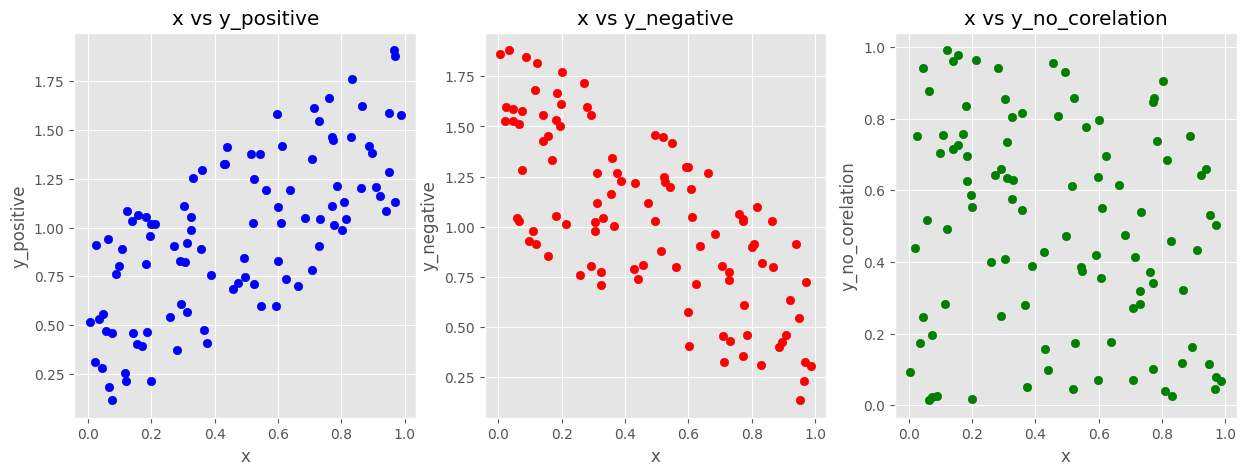

In [164]:
# plotting x vs y_positive, y_negative, y_no_corelation using scatter plot
plt.figure(figsize=(15, 5))

# plotting x vs y_positive
plt.subplot(1, 3, 1)
plt.scatter(x, y_positive, color='blue')
plt.xlabel('x')
plt.ylabel('y_positive')
plt.title('x vs y_positive')

# plotting x vs y_negative
plt.subplot(1, 3, 2)
plt.scatter(x, y_negative, color='red')
plt.xlabel('x')
plt.ylabel('y_negative')
plt.title('x vs y_negative')


# plotting x vs y_no_corelation
plt.subplot(1, 3, 3)
plt.scatter(x, y_no_corelation, color='green')
plt.xlabel('x')
plt.ylabel('y_no_corelation')
plt.title('x vs y_no_corelation')


Text(0.5, 1.0, 'x vs y_no_corelation')

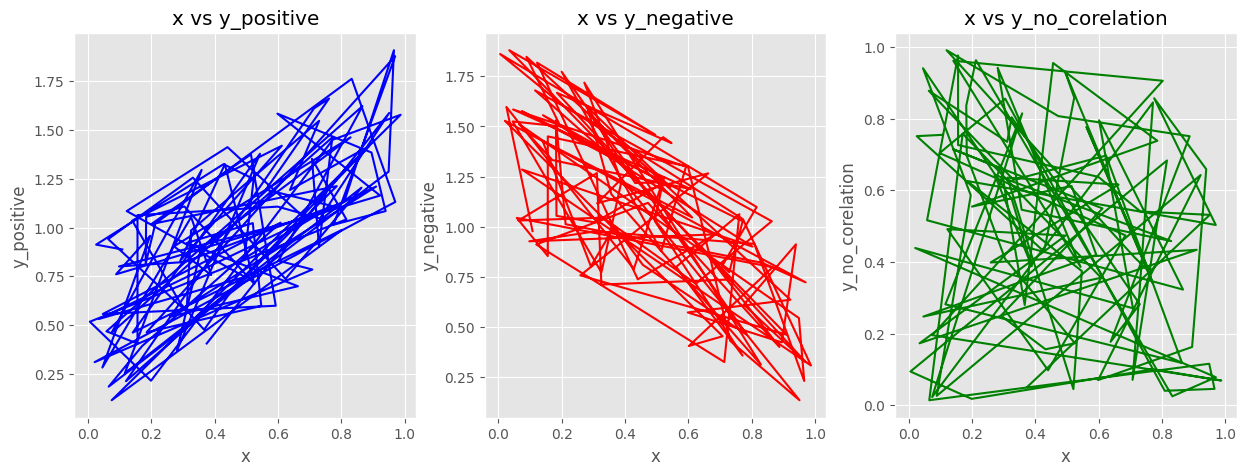

In [165]:
# plotting x vs y_positive, y_negative, y_no_corelation using line plot
plt.figure(figsize=(15, 5))

# plotting x vs y_positive
plt.subplot(1, 3, 1)
plt.plot(x, y_positive, color='blue')
plt.xlabel('x')
plt.ylabel('y_positive')
plt.title('x vs y_positive')

# plotting x vs y_negative
plt.subplot(1, 3, 2)
plt.plot(x, y_negative, color='red')
plt.xlabel('x')
plt.ylabel('y_negative')
plt.title('x vs y_negative')

# plotting x vs y_no_corelation
plt.subplot(1, 3, 3)
plt.plot(x, y_no_corelation, color='green')
plt.xlabel('x')
plt.ylabel('y_no_corelation')
plt.title('x vs y_no_corelation')

<Axes: >

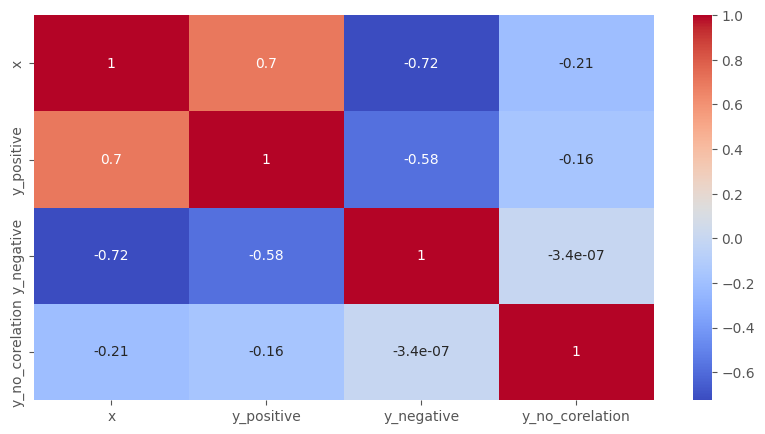

In [166]:
# plotting heatmap for df
plt.figure(figsize=(10, 5))

# converting string to float
df['x'] = df['x'].astype(float)
df['y_positive'] = df['y_positive'].astype(float)
df['y_negative'] = df['y_negative'].astype(float)
df['y_no_corelation'] = df['y_no_corelation'].astype(float)

# converting df to correlation matrix
corr = df.corr()

# plotting heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Figure size 1000x500 with 0 Axes>

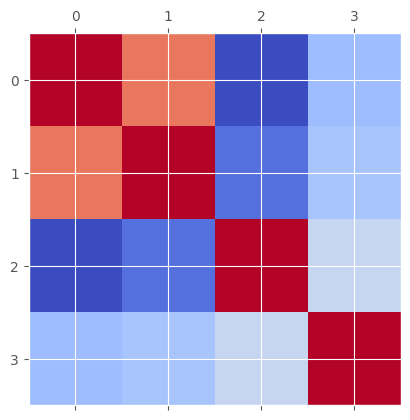

In [191]:
# plotting matshow for df
plt.figure(figsize=(10, 5))

# converting df to correlation matrix
corr = df.corr()

# plotting matshow
plt.matshow(corr, cmap='coolwarm')

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

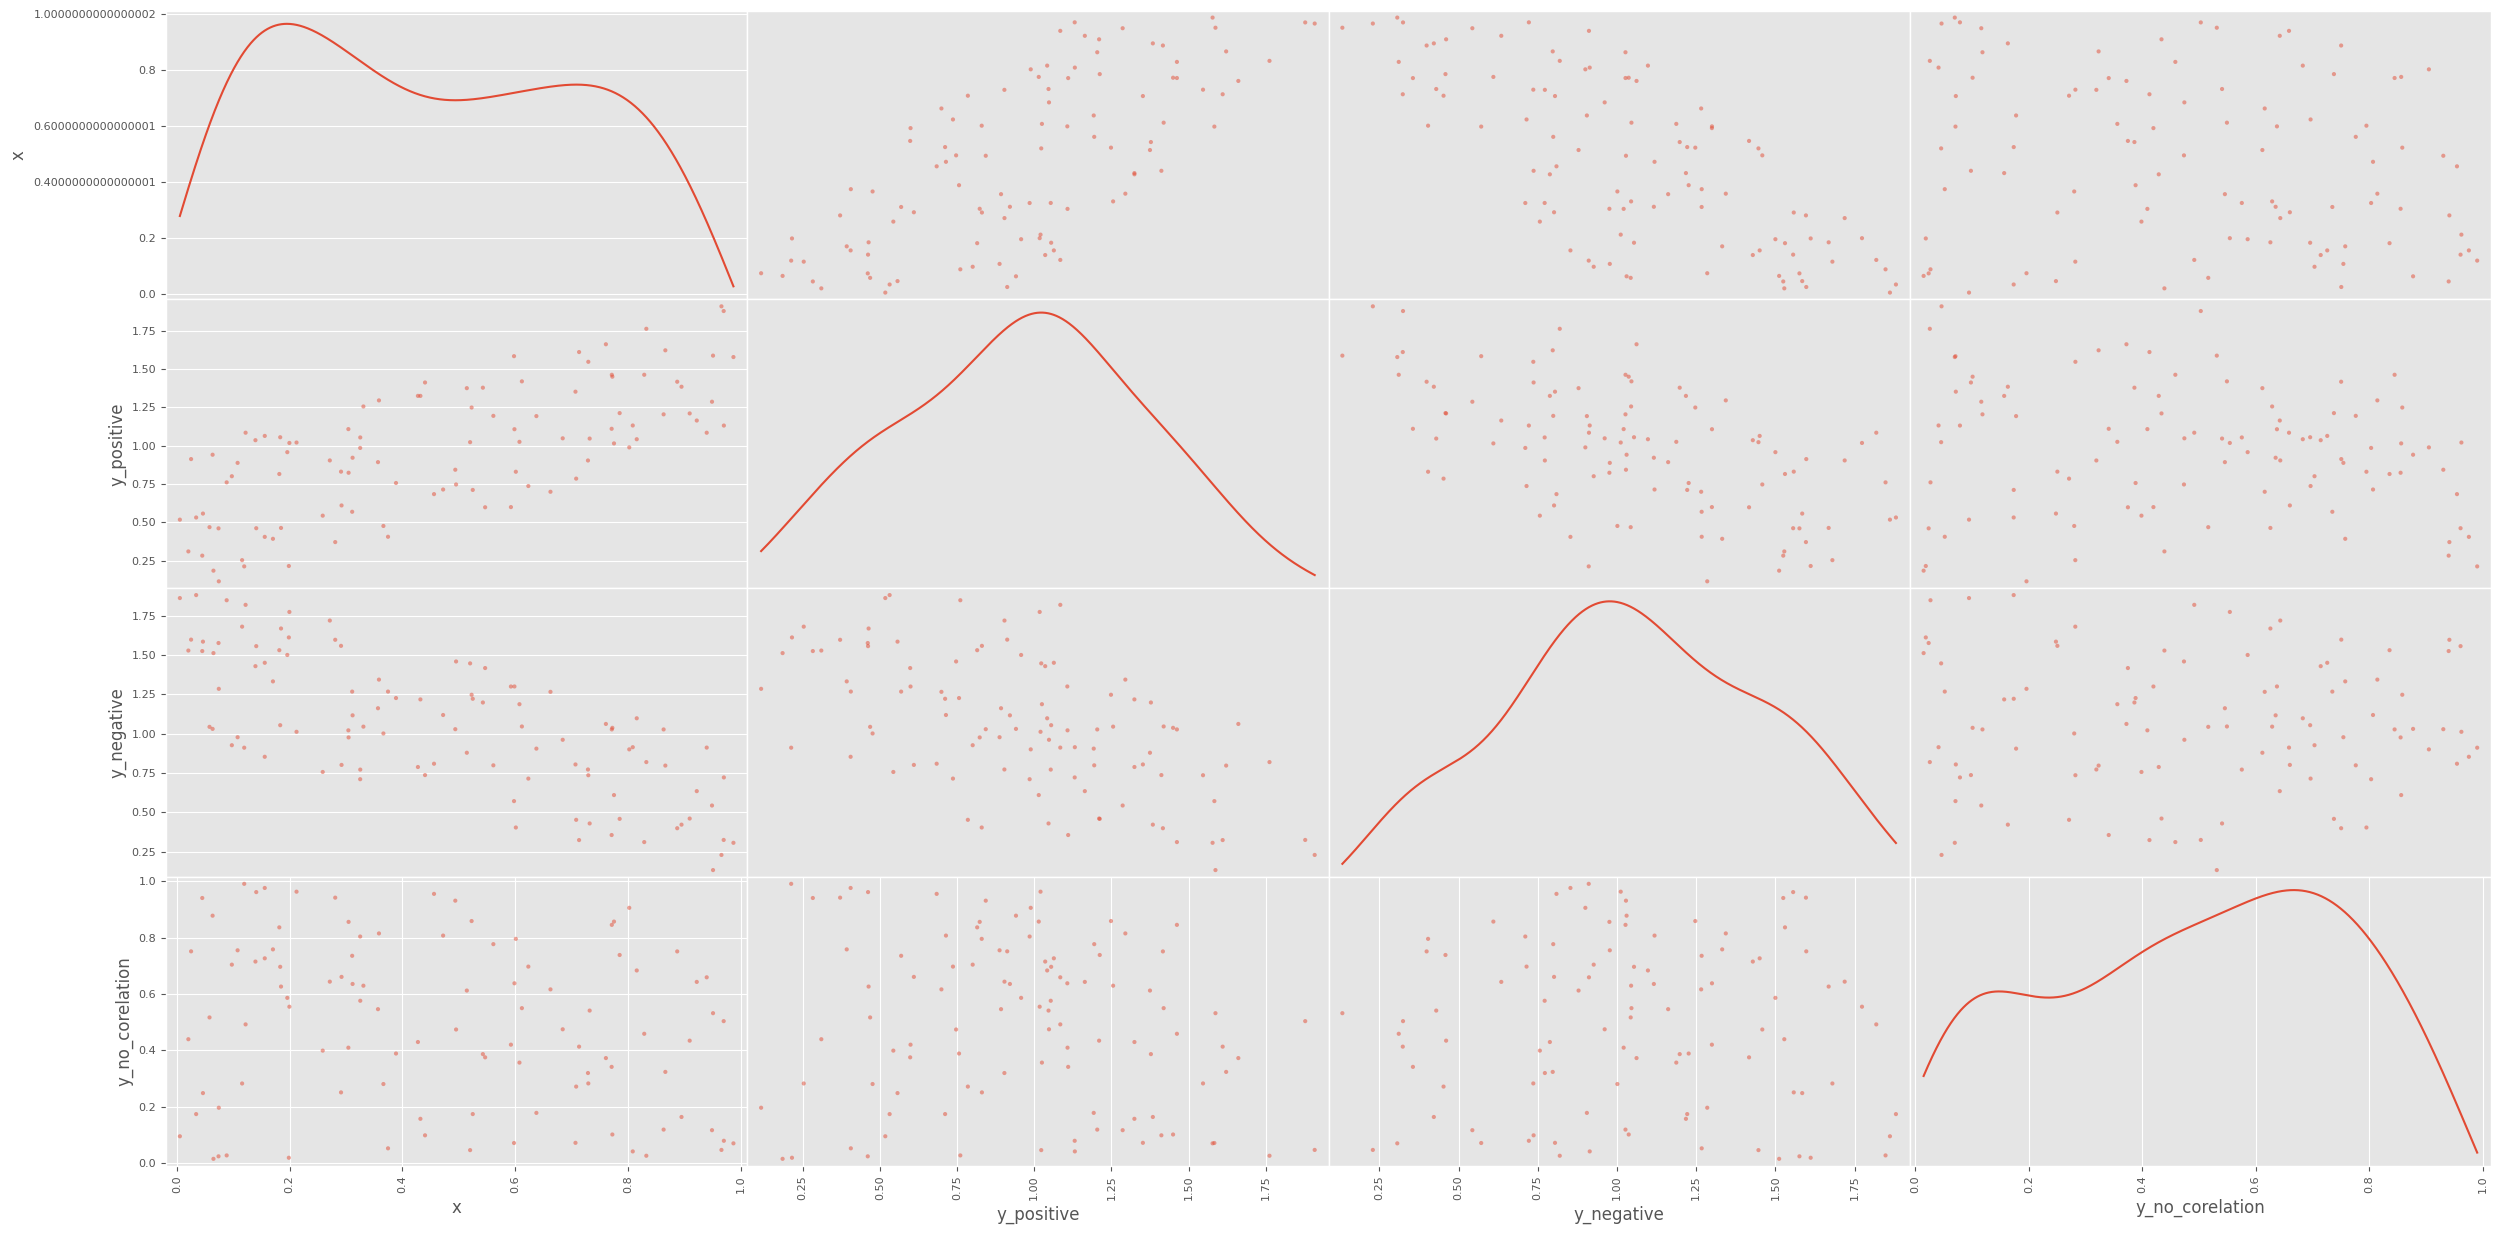

<Figure size 3000x1500 with 0 Axes>

In [198]:
# plotting scatter matrix for df
plt.figure(figsize=(30, 15))

# plotting scatter matrix
pd.plotting.scatter_matrix(df, figsize=(30, 15), diagonal='kde')

# plotting pairplot for df
plt.figure(figsize=(30, 15))

#### Performing on the dataset

In [182]:
# reading the dataset
df_titanic = pd.read_csv('titanic.csv')

# printing the first 5 rows of the dataset
print("df_titanic:\n\n", df_titanic.head().to_markdown())

df_titanic:

 |    |   PassengerId |   Survived |   Pclass | Name                                         | Sex    |   Age |   SibSp |   Parch |   Ticket |    Fare |   Cabin | Embarked   |
|---:|--------------:|-----------:|---------:|:---------------------------------------------|:-------|------:|--------:|--------:|---------:|--------:|--------:|:-----------|
|  0 |           892 |          0 |        3 | Kelly, Mr. James                             | male   |  34.5 |       0 |       0 |   330911 |  7.8292 |     nan | Q          |
|  1 |           893 |          1 |        3 | Wilkes, Mrs. James (Ellen Needs)             | female |  47   |       1 |       0 |   363272 |  7      |     nan | S          |
|  2 |           894 |          0 |        2 | Myles, Mr. Thomas Francis                    | male   |  62   |       0 |       0 |   240276 |  9.6875 |     nan | Q          |
|  3 |           895 |          0 |        3 | Wirz, Mr. Albert                             | male   |  27   | 

In [183]:
# drop the unrequired columns
df_titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [184]:
# convert the sex columns to numerical data 0 or 1
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})

In [187]:
# find qunique values in Embarked column
print("Unique values in Embarked column: ", df_titanic['Embarked'].unique())

# convert the Embarked column to numerical data 0, 1 or 2
df_titanic['Embarked'] = df_titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

Unique values in Embarked column:  ['Q' 'S' 'C']


In [188]:
# getting the updated dataset
print("df_titanic:\n\n", df_titanic.head().to_markdown())

df_titanic:

 |    |   Survived |   Pclass |   Sex |   Age |   SibSp |   Parch |    Fare |   Embarked |
|---:|-----------:|---------:|------:|------:|--------:|--------:|--------:|-----------:|
|  0 |          0 |        3 |     0 |  34.5 |       0 |       0 |  7.8292 |          2 |
|  1 |          1 |        3 |     1 |  47   |       1 |       0 |  7      |          0 |
|  2 |          0 |        2 |     0 |  62   |       0 |       0 |  9.6875 |          2 |
|  3 |          0 |        3 |     0 |  27   |       0 |       0 |  8.6625 |          0 |
|  4 |          1 |        3 |     1 |  22   |       1 |       1 | 12.2875 |          0 |


In [189]:
# getting the correlation matrix
pearson_correlation = df_titanic.corr(method='pearson')
pearson_correlation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,1.000000,-0.000013,0.099943,0.159120,0.191514,0.126779
Pclass,-0.108615,1.000000,-0.108615,-0.492143,0.001087,0.018721,-0.577147,0.031096
Sex,1.000000,-0.108615,1.000000,-0.000013,0.099943,0.159120,0.191514,0.126779
Age,-0.000013,-0.492143,-0.000013,1.000000,-0.091587,-0.061249,0.337932,0.113664
SibSp,0.099943,0.001087,0.099943,-0.091587,1.000000,0.306895,0.171539,-0.100603
Parch,0.159120,0.018721,0.159120,-0.061249,0.306895,1.000000,0.230046,-0.125164
Fare,0.191514,-0.577147,0.191514,0.337932,0.171539,0.230046,1.000000,0.053588
Embarked,0.126779,0.031096,0.126779,0.113664,-0.100603,-0.125164,0.053588,1.000000


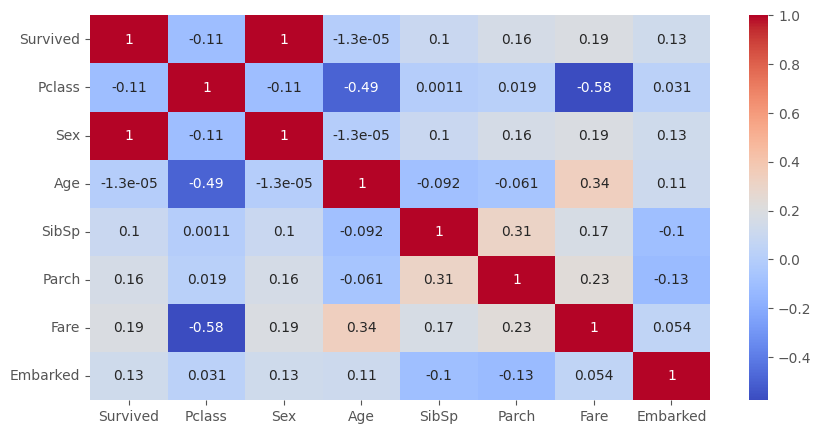

In [190]:
# plot the heatmap
plt.figure(figsize=(10, 5))

# plotting heatmap
sns.heatmap(pearson_correlation, annot=True, cmap='coolwarm')

# getting the correlation matrix
kendall_correlation = df_titanic.corr(method='kendall')


<Figure size 1000x500 with 0 Axes>

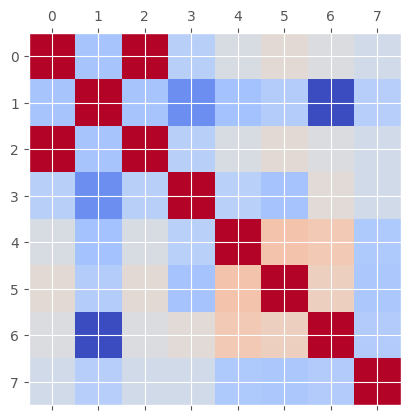

In [199]:
# plot the correlation on matshow
plt.figure(figsize=(10, 5))

# plotting matshow
plt.matshow(kendall_correlation, cmap='coolwarm')

# getting the correlation matrix
spearman_correlation = df_titanic.corr(method='spearman')